In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Solar+Data+Set.csv')

In [4]:
df.dropna(inplace=True)

In [6]:
training_set = df.iloc[:8712,1:2].values
test_set = df.iloc[8712:,1:2].values

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler(feature_range = (0,1))

In [11]:
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)

In [12]:
X_train = []
y_train = []
ws = 24

for i in range(ws,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-ws:i,0:1])
    y_train.append(training_set_scaled[i,0]) 
X_train,y_train = np.array(X_train),np.array(y_train)

In [14]:
X_train.shape

(8688, 24, 1)

In [16]:
# Devloping the LSTM MODEL

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


In [18]:
model_p = Sequential()
model_p.add(LSTM(units=60,return_sequences=True, input_shape=(X_train.shape[1],1)))
model_p.add(Dropout(0.2))

model_p.add(LSTM(units=60,return_sequences=True))
model_p.add(Dropout(0.2))

model_p.add(LSTM(units=60,return_sequences=True))
model_p.add(Dropout(0.2))

model_p.add(LSTM(units=60))
model_p.add(Dropout(0.2))

model_p.add(Dense(units=1))

model_p.compile(optimizer='adam',loss='mean_squared_error')
model_p.fit(X_train,y_train, epochs=30, batch_size=32)


Epoch 1/30


2023-12-01 13:42:22.734317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


272/272 [==============================] - 10s 21ms/step - loss: 0.0233
Epoch 2/30
272/272 [==============================] - 5s 19ms/step - loss: 0.0036
Epoch 3/30
272/272 [==============================] - 5s 19ms/step - loss: 0.0013
Epoch 4/30
272/272 [==============================] - 5s 19ms/step - loss: 0.0015
Epoch 5/30
272/272 [==============================] - 5s 19ms/step - loss: 4.9164e-04
Epoch 6/30
272/272 [==============================] - 5s 19ms/step - loss: 4.5515e-04
Epoch 7/30
272/272 [==============================] - 5s 19ms/step - loss: 4.3941e-04
Epoch 8/30
272/272 [==============================] - 5s 19ms/step - loss: 9.4572e-04
Epoch 9/30
272/272 [==============================] - 5s 19ms/step - loss: 2.7965e-04
Epoch 10/30
272/272 [==============================] - 5s 19ms/step - loss: 2.9271e-04
Epoch 11/30
272/272 [==============================] - 5s 19ms/step - loss: 8.9155e-04
Epoch 12/30
272/272 [==============================] - 5s 19ms/step - loss: 3.

In [19]:
model_p.save('LSTM-Univariant')

INFO:tensorflow:Assets written to: LSTM-Univariant/assets


INFO:tensorflow:Assets written to: LSTM-Univariant/assets


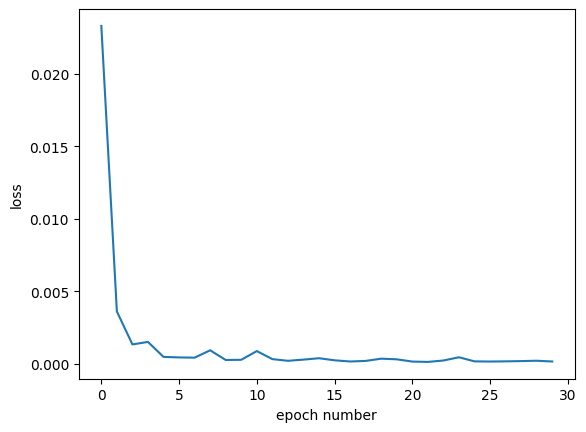

In [20]:
plt.plot(range(len(model_p.history.history['loss'])),model_p.history.history['loss'])
plt.xlabel('epoch number')
plt.ylabel('loss')
plt.show()


In [21]:
from keras.models import load_model
model_loaded = load_model('LSTM-Univariant')

In [24]:
### testing
prediction_test = []
batch_one = training_set_scaled[-ws:]
batch_new = batch_one.reshape((1,ws,1))

for i in range(48):
    first_prediction = model_loaded.predict(batch_new)[0]
    prediction_test.append(first_prediction)
    batch_new = np.append(batch_new[:,1:,:],[[first_prediction]],axis=1)

1/1 [==============================] - 0s 13ms/step


In [28]:
prediction_test = np.array(prediction_test)
prediction = sc.inverse_transform(prediction_test)

In [29]:
prediction

array([[0.00086382],
       [0.00091037],
       [0.00097372],
       [0.00104439],
       [0.00110524],
       [0.00111674],
       [0.00100392],
       [0.00101121],
       [0.01589686],
       [0.08305553],
       [0.11896089],
       [0.13685852],
       [0.14186417],
       [0.13368252],
       [0.1086731 ],
       [0.0641453 ],
       [0.00184798],
       [0.00211162],
       [0.0021786 ],
       [0.0019881 ],
       [0.00161632],
       [0.00123   ],
       [0.00095631],
       [0.00082154],
       [0.0007919 ],
       [0.00082822],
       [0.00090334],
       [0.00098902],
       [0.00106068],
       [0.00107751],
       [0.00097474],
       [0.00109739],
       [0.01580416],
       [0.07993014],
       [0.11447758],
       [0.13196999],
       [0.1366568 ],
       [0.12763788],
       [0.10205523],
       [0.06022744],
       [0.00945172],
       [0.00897535],
       [0.00728402],
       [0.00501382],
       [0.00301761],
       [0.00173465],
       [0.00109057],
       [0.000

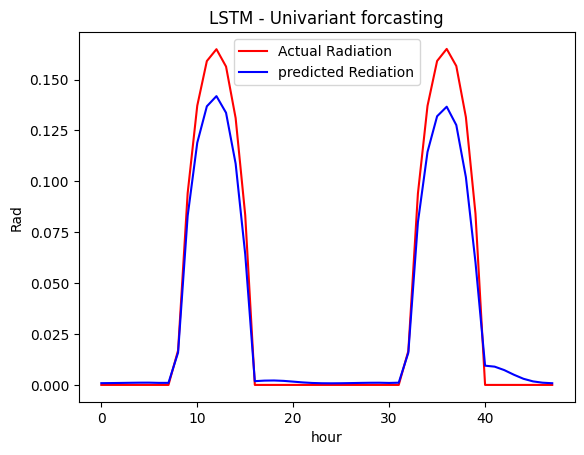

In [30]:
plt.plot(test_set,color='red',label='Actual Radiation')
plt.plot(prediction,color='blue',label='predicted Rediation')
plt.title('LSTM - Univariant forcasting')
plt.xlabel('hour')
plt.ylabel('Rad')
plt.legend()
plt.show()

In [34]:
import math
from sklearn.metrics import mean_squared_error, r2_score
rmse = math.sqrt(mean_squared_error(test_set,prediction))

In [32]:
rmse

0.012669561475824154

In [35]:
r2_score(test_set,prediction)

0.9581820383346336